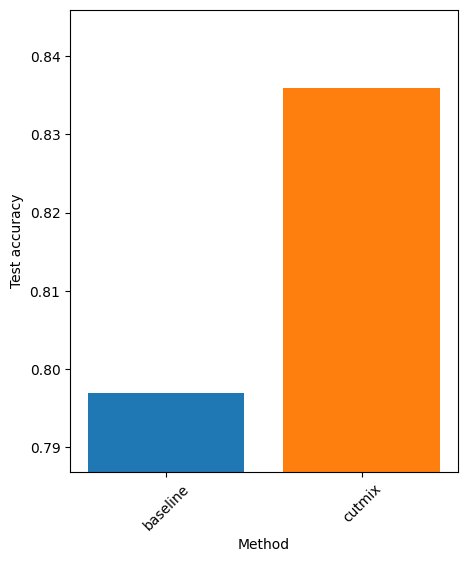

In [7]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/home/kdoherty/spurge/data_release')

# Define the directory containing the JSON files
directory = './results/test_performance'

# Initialize lists to store file names and accuracies
file_names = []
accuracies = []


# Loop through each file in the directory
for file in os.listdir(directory):
    if file.endswith('.json'):
        # Extract the file name without extension
        file_name = os.path.splitext(file)[0]
        file_names.append(file_name)

        # Load the JSON file
        with open(os.path.join(directory, file), 'r') as f:
            data = json.load(f)
            # Extract the accuracy value
            accuracies.append(data.get('accuracy', None))

min_accuracy = min(accuracies)
max_accuracy = max(accuracies)

# Create a DataFrame
df = pd.DataFrame({'Method': file_names, 'Test accuracy': accuracies})

# Plotting the data
plt.figure(figsize=(5, 6))
plt.bar(df['Method'], df['Test accuracy'], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Test accuracy')
plt.xlabel('Method')
plt.xticks(rotation=45)
plt.ylim([min_accuracy - 0.01, max_accuracy + 0.01])

plt.show()

output_path = './results/test_performance.png'
plt.savefig(output_path, bbox_inches='tight')
plt.close()